In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show, export_svg
output_notebook()
from utils.functions import bokeh_hist

Loading BokehJS ...

In [2]:
data_df = pd.read_pickle('./rse_values_all.pkl')
data_df.head()

,Name,SMILES,GCN,GAT,SAGE,GIN,GINE,O_groups,num_OH,num_COOH,num_epoxy,num_CHO,num_keto
0,R_eOH_1_eCOOH__0_eEPOXY_0_eCHO_2_eKETO_0_iOH_1...,c12[c:2]3[c:1]([H:39])[c:23]([O:26][H:37])[c:2...,0.014046,0.017935,0.015995,0.017974,0.017676,5,2,0,1,2,0
1,R_eOH_1_eCOOH__2_eEPOXY_0_eCHO_1_eKETO_0_iOH_1...,c12[c:4]3[c:6]4[c:7]([H:44])[c:10]([C:13](=[O:...,0.040974,0.046081,0.037410,0.041099,0.041665,5,2,2,0,1,0
2,R_eOH_0_eCOOH__2_eEPOXY_2_eCHO_0_eKETO_0_iOH_0...,c12[c:2]3[c:3]([C:4](=[O:30])[O:31][H:44])[c:6...,0.020012,0.018421,0.020326,0.026878,0.021049,5,0,2,3,0,0
3,R_eOH_1_eCOOH__0_eEPOXY_1_eCHO_1_eKETO_0_iOH_2...,c12[c:2]3[c:3]([H:31])[c:5]([H:32])[c:6]4[c:4]...,0.036116,0.042532,0.040300,0.024014,0.046536,5,3,0,1,1,0
4,R_eOH_1_eCOOH__3_eEPOXY_1_eCHO_0_eKETO_0_iOH_0...,c12[c:2]3[c:1]([H:35])[c:26]([O:27][H:43])[c:2...,0.037283,0.034144,0.036787,0.040423,0.037447,5,1,3,1,0,0


In [3]:
data_df.groupby(['num_epoxy'])['GCN'].mean()

num_epoxy
0    0.035289
1    0.032629
2    0.029770
3    0.022772
4    0.038997
Name: GCN, dtype: float32

In [4]:
data_df['O_groups'].value_counts()

O_groups
5    34
4    11
3     6
2     2
Name: count, dtype: int64

In [5]:
data_df.describe()

,GCN,GAT,SAGE,GIN,GINE,O_groups,num_OH,num_COOH,num_epoxy,num_CHO,num_keto
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.031030,0.032780,0.031608,0.033756,0.031456,4.452830,1.754717,0.584906,1.396226,0.301887,0.415094
std,0.009169,0.009314,0.009728,0.010625,0.010007,0.845032,1.124990,0.795032,1.080235,0.638053,0.745085
min,0.013814,0.017935,0.015995,0.013095,0.011920,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025217,0.026083,0.025090,0.026397,0.024770,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.029900,0.030861,0.030646,0.033108,0.030309,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,0.036835,0.040728,0.037410,0.040188,0.037074,5.000000,2.000000,1.000000,2.000000,0.000000,1.000000
max,0.059734,0.058211,0.060739,0.061279,0.061365,5.000000,5.000000,3.000000,4.000000,3.000000,3.000000


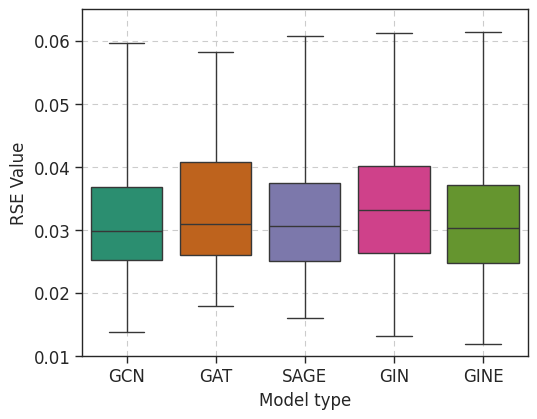

In [7]:
rse_df = data_df.drop(columns=['Name', 'SMILES', 'O_groups', 'num_OH', 'num_COOH', 'num_epoxy', 'num_CHO', 'num_keto'])

sns.set_style('white')
sns.set_context('paper')
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(5.75, 4.5))
sns.boxplot(data=rse_df, palette='Dark2', linewidth=1, ax=ax, whis=(0,100))
plt.grid(linestyle='--', dashes=(5,4))
plt.ylabel('RSE Value', fontsize=12)
plt.xlabel('Model type', fontsize=12)
plt.ylim(0.01, 0.065)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('gnn_boxplot.pdf', format='pdf')
plt.show()

In [13]:
bins = np.linspace(0.01, 0.07, 21)
hist, edges = np.histogram(data_df['GCN'], density=False, bins=bins)

p = bokeh_hist(data_df['GCN'], hist, edges, 1)

# p.xaxis.ticker=[0.01, 0.03, 0.05, 0.07]
# p.xaxis.ticker.base=0.01
p.xaxis.ticker.desired_num_ticks=4
p.xaxis.ticker.num_minor_ticks=4

show(p)